<a href="https://colab.research.google.com/github/nabiladitaputri/Eksperimen-DAA/blob/master/Eksperimen_Algoritma_Improvisasi_Insertion_Sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kode untuk algoritma sorting diadaptasi dari paper Goel & Kumar (2018)

Insertion Sort

In [ ]:
def insertionSort(arr):
  for i in range(1, len(arr)):
    cop = i
    key = arr[cop]
    if key >= arr[cop-1]:
      place = place_finder_right(arr, cop-1, cop - 1, key)
    else:
      place = place_finder_left(arr, 0, cop - 1, key)

    arr = place_inserter(arr, place, cop)
    i = i + 1

def place_finder_right(arr, start, end, key):
  for j in range(start, end+1):
    if key >= arr[j] and key <= arr[j + 1]:
      loc = j + 1
      return loc
    j = j + 1    

def place_finder_left(arr, start, end, key):
  for j in range(end, start-1, -1):
    if j != 0:
      if key <= arr[j] and key >= arr[j - 1]:
        loc = j
        return loc

    else:
      if key <= arr[0]:
        loc = 0
        return loc
    j = j - 1  

In [ ]:
def place_inserter (arr, start, end):
  temp = arr[end]
  for k in range(end, start-1, -1):
    arr[k]=arr[k-1]
    k=k-1
  arr[start]=temp
  return arr

Brownian Motus Insertion Sort

In [ ]:
def bmis(arr):
  pop = 0
  for i in range(1, len(arr)):
    cop = i
    key = arr[cop]
    if key >= arr[pop]:
      place = place_finder_right(arr, pop, cop - 1, key)
    else:
      place = place_finder_left(arr, 0, pop, key)
    
    pop = place
    arr = place_inserter(arr, place, cop)
    i = i + 1

def place_finder_right(arr, start, end, key):
  for j in range(start, end+1):
    if key >= arr[j] and key <= arr[j + 1]:
      loc = j + 1
      return loc
    j = j + 1    

def place_finder_left(arr, start, end, key):
  for j in range(end, start-1, -1):
    if j != 0:
      if key <= arr[j] and key >= arr[j - 1]:
        loc = j
        return loc

    else:
      if key <= arr[0]:
        loc = 0
        return loc
    j = j - 1  

In [ ]:
def place_inserter (arr, start, end):
  temp = arr[end]
  for k in range(end, start-1, -1):
    arr[k]=arr[k-1]
    k=k-1
  arr[start]=temp
  return arr

Clustered Binary Insertion Sort

In [ ]:
def cbis(arr):
  pop = 0 
  for i in range(1, len(arr)):
    cop = i
    key = arr[cop]
    if key >= arr[pop]:
      place = binary_loc_finder(arr, pop + 1, cop - 1, key)
    else:
      place = binary_loc_finder(arr, 0, pop - 1, key)
    pop = place
    arr = place_inserter(arr, place, cop)
    i = i + 1

def binary_loc_finder(arr, start, end, key):
  if start == end:
    if arr[start] > key:
      loc = start
      return loc
    else:
      loc = start + 1
      return loc
  if start > end:
    loc = start
    return loc
  else:
    middle = (start + end) // 2
    if arr[middle] < key:
      return binary_loc_finder(arr, middle + 1, end, key)
    elif arr[middle] > key:
      return binary_loc_finder(arr, start, middle - 1, key)
    else:
      return middle

In [ ]:
def place_inserter (arr, start, end):
  temp = arr[end]
  for k in range(end, start-1, -1):
    arr[k]=arr[k-1]
    k=k-1
  arr[start]=temp
  return arr

Binary Insertion Sort

In [ ]:
def bis(arr):
  for i in range(1, len(arr)):
    cop = i
    key = arr[cop]
    if key >= arr[cop-1]:
      place = binary_loc_finder(arr, cop-1, cop - 1, key)
    else:
      place = binary_loc_finder(arr, 0, cop - 1, key)
    arr = place_inserter(arr, place, cop)
    i = i + 1

def binary_loc_finder(arr, start, end, key):
  if start == end:
    if arr[start] > key:
      loc = start
      return loc
    else:
      loc = start + 1
      return loc
  if start > end:
    loc = start
    return loc
  else:
    middle = (start + end) // 2
    if arr[middle] < key:
      return binary_loc_finder(arr, middle + 1, end, key)
    elif arr[middle] > key:
      return binary_loc_finder(arr, start, middle - 1, key)
    else:
      return middle

# EXPERIMENT

Kode untuk mencari kompleksitas waktu algoritma diadaptasi dari: https://www.codespeedy.com/finding-time-complexity-of-algorithms-in-python/

In [ ]:
import time
import matplotlib.pyplot as plt
%matplotlib inline


def plot_elapsed_time2(input,x,y):

  plt1 = plt.figure(figsize=(15, 7))

  plt.xlabel("No. of elements")
  plt.ylabel("Time required")

  times_is=[]
  times_bmis=[]
  times_bis=[]
  times_cbis=[]
  input_is=input.copy()
  input_bmis=input.copy()
  input_bis=input.copy()
  input_cbis=input.copy()

  # IS
  for a in range(0,x,y):
    start_time = time.time()
    sorted_list = insertionSort(input_is[:a])
    elapsed_time = time.time() - start_time
    times_is.append(elapsed_time)
  a=[i for i in range(0,x,y)]
  plt.plot(a,times_is)

# BMIS
  for b in range(0,x,y):
    start_time = time.time()
    sorted_list = bmis(input_bmis[:b])
    elapsed_time = time.time() - start_time
    times_bmis.append(elapsed_time)
  b=[i for i in range(0,x,y)]
  plt.plot(b,times_bmis)

# BIS
  for c in range(0,x,y):
    start_time = time.time()
    sorted_list = bis(input_bis[:c])
    elapsed_time = time.time() - start_time
    times_bis.append(elapsed_time)
  c=[i for i in range(0,x,y)]
  plt.plot(c,times_bis)

# CBIS
  for d in range(0,x,y):
    start_time = time.time()
    sorted_list = cbis(input_cbis[:d])
    elapsed_time = time.time() - start_time
    times_cbis.append(elapsed_time)
  d=[i for i in range(0,x,y)]
  plt.plot(d,times_cbis)
  
  plt.xticks(d, d)
  plt.legend(['is', 'bmis', 'bis', 'cbis'])

Random Input

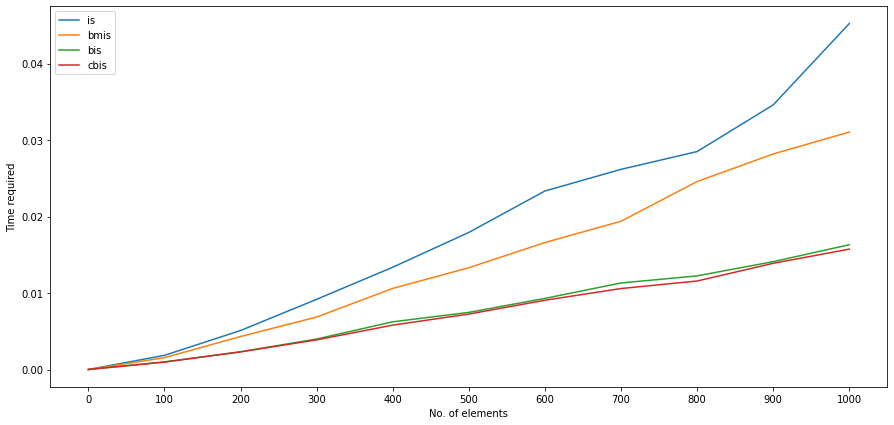

In [ ]:
import numpy as np
randomized_input = np.random.randint(low=1, high=1000, size=1000)
plot_elapsed_time2(randomized_input,1001,100)

Ascending input

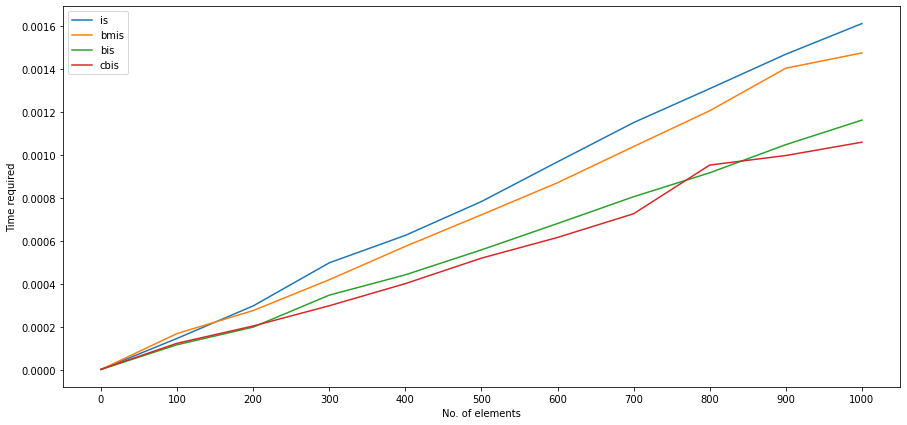

In [ ]:
ascending_input =  [i for i in range(1000)]
plot_elapsed_time2(ascending_input,1001,100)

Descending input

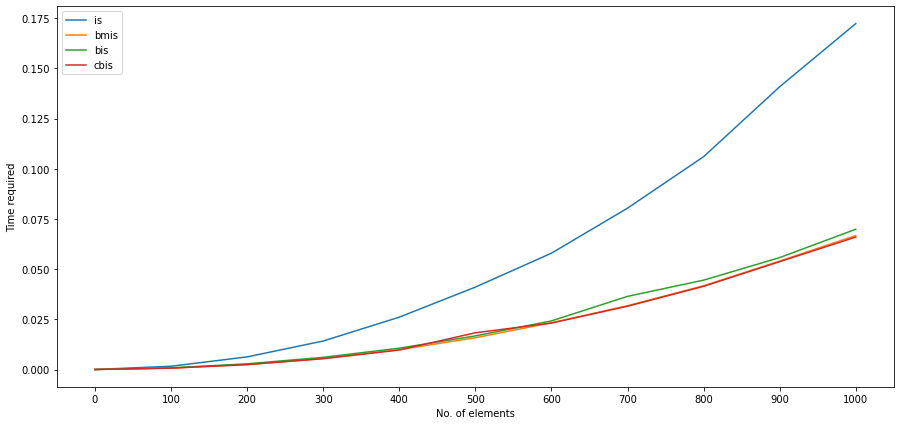

In [ ]:
descending_input =  [i for i in range(1000)][::-1]
plot_elapsed_time2(descending_input,1001,100)